# Exploratory Data Analysis on Austin Animal Center Together

## Table of Contents: 
 
   * [General Information](#general-information) 
   <br/><br/> 
   * [Aged Animals](#aged-animals) 
   <br/><br/> 
   * [Animals Returned](#animals-returned) 
   <br/><br/> 
   * [Location & Time](#location+time) 
   <br/><br/> 
       
    ethunasia 이유로 intake한 동물들이 ethunasia/died로 outcome 되었는 지
    intake에서 returned한 동물들이 outcome type이 무엇이었는 지

In [1]:
import pandas as pd

In [2]:
intakes = pd.read_csv('Cleaned_Intakes.csv',index_col=0)
outcomes = pd.read_csv('Cleaned_Outcomes.csv',index_col=0)

In [3]:
print("total intakes cases: " + str(intakes.shape[0]))
print("total number of animals: " + str(intakes['Animal ID'].nunique()))
print("number of cases that is not first case of each animal: " + str(intakes.shape[0] - intakes['Animal ID'].nunique()))

total intakes cases: 124120
total number of animals: 110926
number of cases that is not first case of each animal: 13194


In [4]:
print("total outcomes cases: " + str(outcomes.shape[0]))
print("total number of animals: " + str(outcomes['Animal ID'].nunique()))
print("number of cases that is not first case of each animal: " + str(outcomes.shape[0] - outcomes['Animal ID'].nunique()))

total outcomes cases: 124491
total number of animals: 111309
number of cases that is not first case of each animal: 13182


 ## Merge intakes and outcomes
   *Both intakes and outcomes datasets contain duplicate Animal IDs. \
   Examples with same animal ID are not duplicate examples. There exists animals that have come to the shelter more than once.\
   We would like to keep cases with duplicate animal IDs, since information about returned animals can be useful.

In [5]:
returned_intakes = intakes[intakes.duplicated('Animal ID',keep='first')].sort_values(['Animal ID','DateTime'])
returned_intakes.head()

,Animal ID,Name,DateTime,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,Year,Month
84304,A006100,Scamp,2014-03-07,8700 Research in Austin (TX),Public Assist,Normal,Dog,Neutered Male,6,Spinone Italiano Mix,Yellow/White,2014,3
18662,A006100,Scamp,2017-12-07,Colony Creek And Hunters Trace in Austin (TX),Stray,Normal,Dog,Neutered Male,10,Spinone Italiano Mix,Yellow/White,2017,12
113010,A245945,Boomer,2015-05-20,7403 Blessing Ave in Austin (TX),Stray,Normal,Dog,Neutered Male,15,Labrador Retriever Mix,Tan,2015,5
62644,A282897,Toby,2015-07-06,Austin (TX),Owner Surrender,Normal,Cat,Neutered Male,13,Domestic Shorthair Mix,Black Smoke/White,2015,7
110013,A287017,Stitch,2014-12-12,Lazy Oaks /Westgate William Cannon in Austin (TX),Stray,Aged,Dog,Spayed Female,13,Chihuahua Shorthair Mix,Black/White,2014,12


In [6]:
returned_outcomes = outcomes[outcomes.duplicated('Animal ID',keep='first')].sort_values(['Animal ID','DateTime'])
returned_outcomes.head()

,Animal ID,Name,DateTime,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,Year,Month
107324,A006100,Scamp,2014-03-08,Return to Owner,NaN,Dog,Neutered Male,6,Spinone Italiano Mix,Yellow/White,2014,3
94523,A006100,Scamp,2017-12-07,Return to Owner,NaN,Dog,Neutered Male,10,Spinone Italiano Mix,Yellow/White,2017,12
84453,A245945,Boomer,2014-07-04,Return to Owner,NaN,Dog,Neutered Male,14,Labrador Retriever Mix,Tan,2014,7
106950,A282897,Toby,2015-07-11,Adoption,NaN,Cat,Neutered Male,13,Domestic Shorthair Mix,Black Smoke/White,2015,7
66245,A287017,Stitch,2015-08-16,Return to Owner,NaN,Dog,Spayed Female,14,Chihuahua Shorthair Mix,Black/White,2015,8


In [7]:
print(intakes.shape[0])
print(outcomes.shape[0])

124120
124491


In [8]:
# create a function that returns a column with new animal IDs (original animal ID + another digit that indicates returned animal)
def new_animalID(animalID_col):
    temp_dict = {}
    new_animalID_col = []
    for id in animalID_col:
        if id not in temp_dict.keys():
            temp_dict[id] = 1
        else:
            temp_dict[id] += 1
        new_animalID_col.append(id + '-'+ str(temp_dict[id]))
    return pd.Series(new_animalID_col, name='New_Animal_ID')     

In [9]:
diff_col = []
for i in intakes.columns:
    if i not in outcomes.columns:
        diff_col.append(i)
print('diff_col: ' + str(diff_col))
same_col = []
for i in intakes.columns:
    if i in outcomes.columns:
        same_col.append(i)
print('same_col :' + str(same_col))

diff_col: ['Found Location', 'Intake Type', 'Intake Condition', 'Sex upon Intake', 'Age upon Intake']
same_col :['Animal ID', 'Name', 'DateTime', 'Animal Type', 'Breed', 'Color', 'Year', 'Month']


In [10]:
intakes.rename(columns={'DateTime':'Intake_DateTime','Year':'Intake_Year','Month':'Intake_Month'},inplace=True)
intakes.head()

,Animal ID,Name,Intake_DateTime,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,Intake_Year,Intake_Month
0,A786884,*Brock,2019-01-03,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2,Beagle Mix,Tricolor,2019,1
1,A706918,Belle,2015-07-05,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8,English Springer Spaniel,White/Liver,2015,7
2,A724273,Runster,2016-04-14,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,0,Basenji Mix,Sable/White,2016,4
3,A665644,NaN,2013-10-21,Austin (TX),Stray,Sick,Cat,Intact Female,0,Domestic Shorthair Mix,Calico,2013,10
4,A682524,Rio,2014-06-29,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,2014,6


In [11]:
outcomes.rename(columns={'DateTime':'Outcome_DateTime','Year':'Outcome_Year','Month':'Outcome_Month'},inplace=True)
outcomes.head()

,Animal ID,Name,Outcome_DateTime,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,Outcome_Year,Outcome_Month
0,A794011,Chunk,2019-05-08,Rto-Adopt,NaN,Cat,Neutered Male,2,Domestic Shorthair Mix,Brown Tabby/White,2019,5
1,A776359,Gizmo,2018-07-18,Adoption,NaN,Dog,Neutered Male,1,Chihuahua Shorthair Mix,White/Brown,2018,7
2,A821648,NaN,2020-08-16,Euthanasia,NaN,Other,Unknown,1,Raccoon,Gray,2020,8
3,A720371,Moose,2016-02-13,Adoption,NaN,Dog,Neutered Male,0,Anatol Shepherd/Labrador Retriever,Buff,2016,2
4,A674754,NaN,2014-03-18,Transfer,Partner,Cat,Intact Male,0,Domestic Shorthair Mix,Orange Tabby,2014,3


In [12]:
# sort data by animal id and datetime to find out which case happened first among duplicate animal ids
intakes.sort_values(['Animal ID','Intake_DateTime'], ignore_index=True, inplace=True)
new_animalID_col = new_animalID(intakes['Animal ID'])
intakes['New_Animal_ID'] = new_animalID_col
intakes.head()

,Animal ID,Name,Intake_DateTime,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,Intake_Year,Intake_Month,New_Animal_ID
0,A006100,Scamp,2014-03-07,8700 Research in Austin (TX),Public Assist,Normal,Dog,Neutered Male,6,Spinone Italiano Mix,Yellow/White,2014,3,A006100-1
1,A006100,Scamp,2014-12-19,8700 Research Blvd in Austin (TX),Public Assist,Normal,Dog,Neutered Male,7,Spinone Italiano Mix,Yellow/White,2014,12,A006100-2
2,A006100,Scamp,2017-12-07,Colony Creek And Hunters Trace in Austin (TX),Stray,Normal,Dog,Neutered Male,10,Spinone Italiano Mix,Yellow/White,2017,12,A006100-3
3,A047759,Oreo,2014-04-02,Austin (TX),Owner Surrender,Normal,Dog,Neutered Male,10,Dachshund,Tricolor,2014,4,A047759-1
4,A134067,Bandit,2013-11-16,12034 Research Blvd in Austin (TX),Public Assist,Injured,Dog,Neutered Male,16,Shetland Sheepdog,Brown/White,2013,11,A134067-1


In [13]:
outcomes.sort_values(['Animal ID','Outcome_DateTime'], ignore_index=True, inplace=True)
new_animalID_col = new_animalID(outcomes['Animal ID'])
outcomes['New_Animal_ID'] = new_animalID_col
outcomes.head()

,Animal ID,Name,Outcome_DateTime,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,Outcome_Year,Outcome_Month,New_Animal_ID
0,A006100,Scamp,2014-03-08,Return to Owner,NaN,Dog,Neutered Male,6,Spinone Italiano Mix,Yellow/White,2014,3,A006100-1
1,A006100,Scamp,2014-12-20,Return to Owner,NaN,Dog,Neutered Male,7,Spinone Italiano Mix,Yellow/White,2014,12,A006100-2
2,A006100,Scamp,2017-12-07,Return to Owner,NaN,Dog,Neutered Male,10,Spinone Italiano Mix,Yellow/White,2017,12,A006100-3
3,A047759,Oreo,2014-04-07,Transfer,Partner,Dog,Neutered Male,10,Dachshund,Tricolor,2014,4,A047759-1
4,A134067,Bandit,2013-11-16,Return to Owner,NaN,Dog,Neutered Male,16,Shetland Sheepdog,Brown/White,2013,11,A134067-1


In [14]:
# some of columns in intakes and outcomes contain identical information
same_info_cols = ['Animal ID', 'Name', 'Animal Type', 'Breed', 'Color']
# merge intakes and outcomes without identical information
combined = intakes.merge(outcomes.drop(same_info_cols, axis=1), how='outer', on='New_Animal_ID')
combined.head()

,Animal ID,Name,Intake_DateTime,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,...,Intake_Year,Intake_Month,New_Animal_ID,Outcome_DateTime,Outcome Type,Outcome Subtype,Sex upon Outcome,Age upon Outcome,Outcome_Year,Outcome_Month
0,A006100,Scamp,2014-03-07,8700 Research in Austin (TX),Public Assist,Normal,Dog,Neutered Male,6.0,Spinone Italiano Mix,...,2014.0,3.0,A006100-1,2014-03-08,Return to Owner,NaN,Neutered Male,6.0,2014.0,3.0
1,A006100,Scamp,2014-12-19,8700 Research Blvd in Austin (TX),Public Assist,Normal,Dog,Neutered Male,7.0,Spinone Italiano Mix,...,2014.0,12.0,A006100-2,2014-12-20,Return to Owner,NaN,Neutered Male,7.0,2014.0,12.0
2,A006100,Scamp,2017-12-07,Colony Creek And Hunters Trace in Austin (TX),Stray,Normal,Dog,Neutered Male,10.0,Spinone Italiano Mix,...,2017.0,12.0,A006100-3,2017-12-07,Return to Owner,NaN,Neutered Male,10.0,2017.0,12.0
3,A047759,Oreo,2014-04-02,Austin (TX),Owner Surrender,Normal,Dog,Neutered Male,10.0,Dachshund,...,2014.0,4.0,A047759-1,2014-04-07,Transfer,Partner,Neutered Male,10.0,2014.0,4.0
4,A134067,Bandit,2013-11-16,12034 Research Blvd in Austin (TX),Public Assist,Injured,Dog,Neutered Male,16.0,Shetland Sheepdog,...,2013.0,11.0,A134067-1,2013-11-16,Return to Owner,NaN,Neutered Male,16.0,2013.0,11.0


In [15]:
print(returned_intakes.shape[0])
print(returned_outcomes.shape[0])
print(combined.shape[0])

13194
13182
125045


In [16]:
combined.isnull().sum()

Animal ID             925
Name                39976
Intake_DateTime       925
Found Location        925
Intake Type           925
Intake Condition      925
Animal Type           925
Sex upon Intake       926
Age upon Intake       925
Breed                 925
Color                 925
Intake_Year           925
Intake_Month          925
New_Animal_ID           0
Outcome_DateTime      554
Outcome Type          574
Outcome Subtype     67737
Sex upon Outcome      555
Age upon Outcome      554
Outcome_Year          554
Outcome_Month         554
dtype: int64

In [17]:
combined['Name'].unique

<bound method Series.unique of 0          Scamp
1          Scamp
2          Scamp
3           Oreo
4         Bandit
           ...  
125040       NaN
125041       NaN
125042       NaN
125043       NaN
125044       NaN
Name: Name, Length: 125045, dtype: object>

<AxesSubplot:>

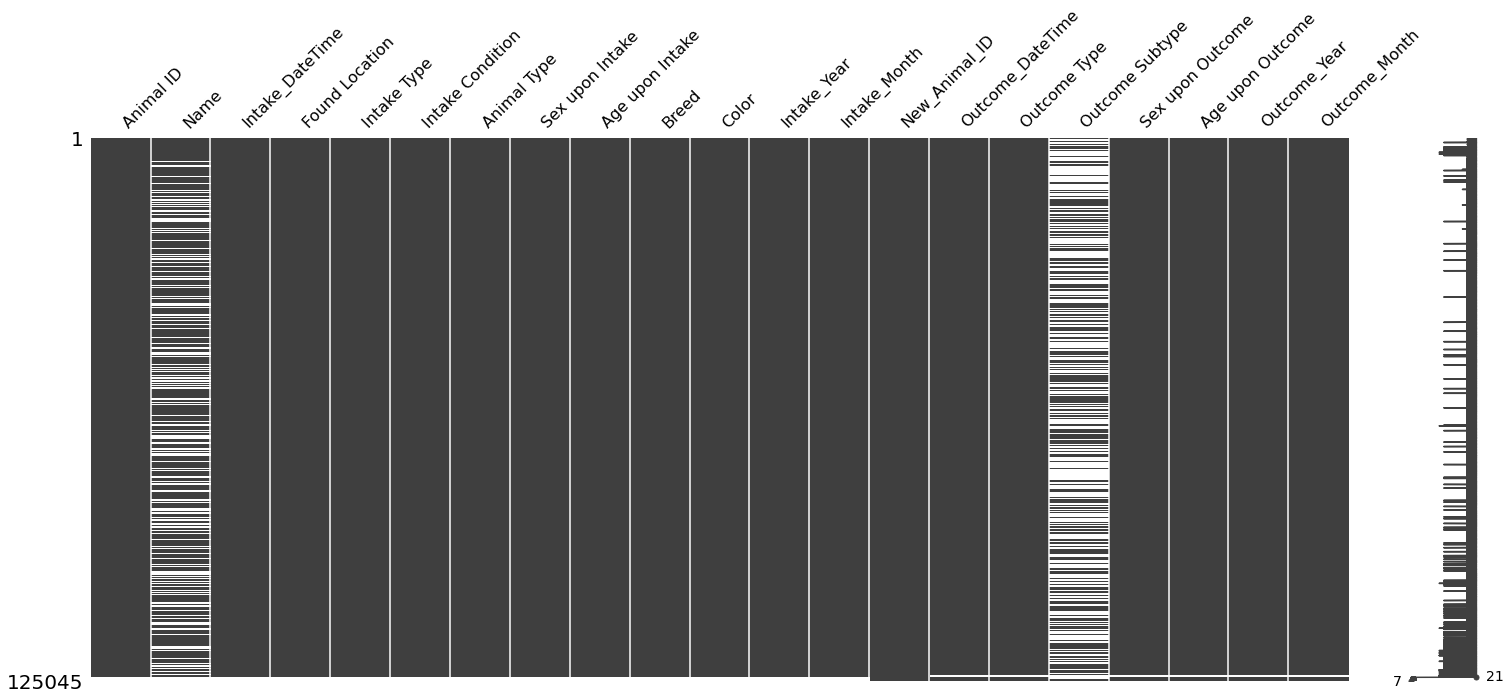

In [18]:
import missingno as msno
msno.matrix(combined)

In [19]:
same_info_cols

['Animal ID', 'Name', 'Animal Type', 'Breed', 'Color']

In [20]:
combined.to_csv('Cleaned_Combined.csv')